In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Pemrosesan Data
Data frame dari G-drive diolah dengan menjumlah setiap baris sehingga menghasilkan output sum di kolom yang baru. kemudian data menampilkan hasil sum saja

In [3]:
df=pd.read_csv('/content/gdrive/MyDrive/TelinData/test_anomaly2.csv',skiprows=10)
#df = df.drop(df.columns[0], axis=1)
#df = df.dropna()
df["sum"] = df.sum(axis=1)
df=df[["sum"]]
df = df.reset_index(drop=True)
raw_data = df.values
print(df)

               sum
0     1.769646e+12
1     1.777969e+12
2     1.812370e+12
3     1.799117e+12
4     1.858444e+12
...            ...
1802  3.467573e+11
1803  3.410406e+11
1804  3.326221e+11
1805  3.218255e+11
1806  3.156855e+11

[1807 rows x 1 columns]


#Flatten 1D array
dataframe sum dijadikan array untuk diolah menggunakan Distribusi Gaussian/Normal

In [4]:

out = df.values.flatten()
out.sort()
x_axis=out**0.5
print(x_axis)

[1.73207967e+02 1.73207967e+02 1.73207967e+02 ... 1.95418830e+06
 1.97833219e+06 2.29379372e+06]


#Gaussian Distribution / Normal Distribution

In [5]:
mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)

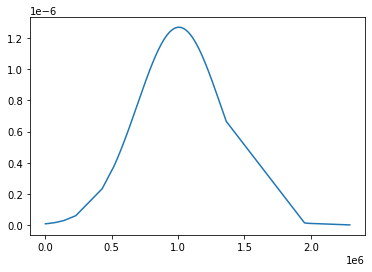

In [6]:
plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
plt.show()

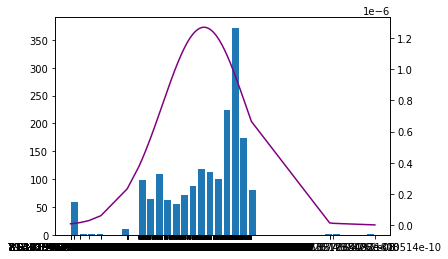

In [7]:

histo = plt.hist(x_axis,bins=36,rwidth=0.8)
plt.xticks(x_axis, norm.pdf(x_axis, mean, sd))
plt.twinx()
NormalEdge = plt.plot(x_axis, norm.pdf(x_axis, mean, sd),color='purple')
plt.xticks(x_axis, norm.pdf(x_axis, mean, sd))


plt.show()


In [ ]:
Anomaly=min(out)
print(Anomaly)

30001.0


In [12]:
df=pd.read_csv('/content/gdrive/MyDrive/TelinData/test_anomaly2.csv',skiprows=10)
#df = df.drop(df.columns[0], axis=1)
#df = df.dropna()
df["sum"] = df.sum(axis=1)

#df=df[["Date"],["sum"]]
df = df.reset_index(drop=True)
#raw_data = df.values
print(df)

                     Date  ...           sum
0     2020-12-02 20:25:00  ...  1.769646e+12
1     2020-12-02 20:30:00  ...  1.777969e+12
2     2020-12-02 20:35:00  ...  1.812370e+12
3     2020-12-02 20:40:00  ...  1.799117e+12
4     2020-12-02 20:45:00  ...  1.858444e+12
...                   ...  ...           ...
1802     2020-12-09 02:35  ...  3.467573e+11
1803     2020-12-09 02:40  ...  3.410406e+11
1804     2020-12-09 02:45  ...  3.326221e+11
1805     2020-12-09 02:50  ...  3.218255e+11
1806     2020-12-09 02:55  ...  3.156855e+11

[1807 rows x 20 columns]


In [ ]:
def auto_answer(Anomaly):
  answer = df.loc[df['sum'] == Anomaly ]
  if not answer.empty:
    answer = answer.iloc[0]['Date']
    return answer
  else:
    return "Tidak ada anomaly"

In [ ]:
auto_answer(Anomaly)

'2020-12-07 22:05'

In [13]:
lower_limit = df['sum'].mean() -3*df['sum'].std()
lower_limit

-497303117064.53564

In [14]:
upper_limit = df['sum'].mean() + 3*df['sum'].std()
upper_limit

2718502853663.614

In [15]:
outlier=df[(df['sum']>upper_limit) | (df['sum']<lower_limit)]
outlier

,Date,PE-D2-JT2-HSI-ae21-AGGR-LINK_PE-D2-JT2-SPEEDY/ae21_TO_CDN_FACEBOOK(FCGK18-1)_1x100G,PE-D2-JT2-HSI-ae22-AGGR-LINK_PE-D2-JT2-SPEEDY/ae22_TO_CDN_FACEBOOK(FCGK18-2)_1x100G,PE-D1-MDC-HSI-ae7-AGGR-LINK_PE-D1-MDC-SPEEDY/ae7_TO_CDN_FACEBOOK(FKNO3-1)_1x100G,PE-D5-KBL-HSI-ae12-AGGR-LINK_PE-D5-KBL-SPEEDY/ae12_TO_CDN_FACEBOOK(FSUB8-1)_1x100G,PE-D6-BAM-SPEEDY-ae8-AGGR-LINK_PE-D6-BAM-HSI/ae8_TO_CDN_FACEBOOK(FBPN2-1)_1x100G,PE-D4-KBU-SPEEDY/ae13_TO_CDN_FACEBOOK(FJOG3-1)_1x100G_2-205432947,PE-D5-KLM-SPEEDY-ae12-AGGR-LINK_PE-D5-KLM-SPEEDY/ae12_TO_CDN_FACEBOOK(FDPS5-1)_1x100G,PE-D1-PGC-HSI-ae12-TO_CDN_FACEBOOK(FPLM4-1)_1x100Gae12_TO_CDN_FACEBOOK(FPLM4-1)_1x100G,PE-D6-BJM-SPEEDY-ae12-AGGR-LINK_PE-D6 BJM-SPEEDY-TO_CDN_FACEBOOK(FBDJ4-1)_1x100G_ae12_TO_CDN_FACEBOOK(FBDJ4-1)_1x100G,PE-D7-PTR-HSI-ae8-2-510979601_MM_ASTINET_AGGR-LINK_PE-D7-PTR-SPEEDY-TO_CDN_FACEBOOK(FUPG5-1)_2x100G,PE-D1-PUB-HSI-ae11-AGGR-LINK_ASTINET_2-541579888_PE-D1-PUB-HSI/ae7_TO_CDN_FACEBOOK,PE-D7-BAL-HSI-ae19-AGGR-LINK_PE-D7-BAL-HSI/ae19_TO_CDN_FACEBOOK,PE-D3-LBG-SPEEDY-ae12-AGGR-LINK_PE-D3-LBG-SPEEDY/ae12_TO_CDN_FACEBOOK(FBDO9-1),AGGR-LINK_PE-D2-CKA-HSI/ae17,AGGR-LINK_PE-D6-BPP-HSI/ae16_TO_CDN_FACEBOOK_2-587151638,AGGR-LINK_PE-D6-BPP-HSI/ae16_TO_CDN_FACEBOOK_2-587151638,AGGR-LINK_PE-D6-PTK-HSI/ae20_TO_CDN_FACEBOOK(FPNK-3)_1x100G,AGGR-LINK_PE-D6-ULN-HSI/ae17_TO_CDN_FACEBOOK(FBDJ-5)_1x100G,sum
1158,2020-12-06 20:55,1.110000e+12,1.100000e+12,1.593687e+11,1.616930e+11,1.567725e+11,1.267269e+11,1.194734e+11,1.458125e+11,1.575763e+11,1.466416e+11,1.433637e+11,1.316835e+11,1.596038e+11,3.233650e+07,3.544949e+07,3.267925e+07,3.534283e+07,4.000000e+04,3.818852e+12
1159,2020-12-06 21:00,1.110000e+12,1.110000e+12,1.586952e+11,1.556554e+11,1.547591e+11,1.278214e+11,1.191957e+11,1.461161e+11,1.534927e+11,1.460382e+11,1.447511e+11,1.303030e+11,1.554704e+11,3.347923e+07,3.315947e+07,3.514025e+07,3.791680e+07,6.000000e+04,3.812438e+12
1160,2020-12-06 21:05,1.150000e+12,1.150000e+12,1.585824e+11,1.569932e+11,1.552688e+11,1.322909e+11,1.206699e+11,1.485122e+11,1.555083e+11,1.468559e+11,1.471231e+11,1.325055e+11,1.593499e+11,3.384292e+07,3.396010e+07,3.283479e+07,3.741024e+07,2.000000e+04,3.913798e+12
1510,2020-12-08 02:15,NaN,1.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.261490e+12,5.261490e+12


In [11]:
outliers=len(outlier)
anomaly=8
print("Accuracy percentage:", 100*outliers/anomaly)

Accuracy percentage: 50.0
